# Seção 20.04 - Agrupamento Hierárquico (Spending score)
Para esta seção, usarei a base de dados "Mall_Customers.csv" disponibilizada no curso Machine Learning A-Z™: Hands-On Python & R In Data Science.

In [1]:
# Instruções basiconas de sempre.

# Lidar com dataframes.
import numpy as np
import pandas as pd

# Lidar com gráficos.
import matplotlib.pyplot as plt
import seaborn as sns

# Lidar com preparação de dados.
# from data_prep import data_prep as dp # Eu que fiz esse modulinho ("uuuuuuuuuma bosts!").
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Lidar com validação de modelos.
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)

In [2]:
nomeDaBase = "../../bases/Mall_Customers.csv"
df = pd.read_csv(nomeDaBase, sep=",", encoding="utf-8", index_col=0)

df.head(10).T

CustomerID,1,2,3,4,5,6,7,8,9,10
Genre,Male,Male,Female,Female,Female,Female,Female,Female,Male,Female
Age,19,21,20,23,31,22,35,23,64,30
Annual Income (k$),15,15,16,16,17,17,18,18,19,19
Spending Score (1-100),39,81,6,77,40,76,6,94,3,72


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.0+ KB


In [8]:
atributos_int = df.select_dtypes(include=["int64"]).columns

for atributos in atributos_int:
    df[atributos] = df[atributos].astype(float)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
Genre                     200 non-null object
Age                       200 non-null float64
Annual Income (k$)        200 non-null float64
Spending Score (1-100)    200 non-null float64
dtypes: float64(3), object(1)
memory usage: 7.0+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


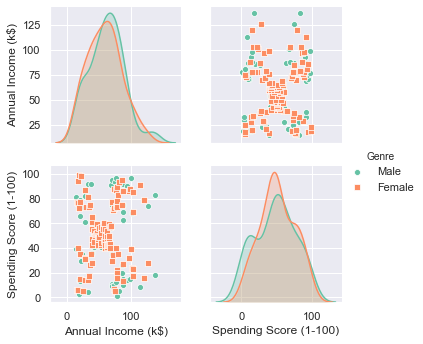

In [10]:
sns.set(style="darkgrid")

sns.pairplot(df[["Annual Income (k$)","Spending Score (1-100)", "Genre"]]
             , kind="scatter"
             , hue="Genre"
             , markers=["o", "s"]
             , palette="Set2")
plt.show();

### Análise preliminar da base:
Nenhuma incosistêcia ou erros foram encontrados.

# Procurando o número de clusters com dendrograma

In [14]:
# Separando os fatores/previsores da resposta/target:
    
x = df.iloc[:, 2:]
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

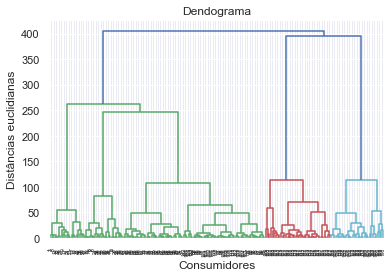

In [18]:
import scipy.cluster.hierarchy as sch

dendrograma = sch.dendrogram(sch.linkage(x, method="ward"))

plt.title("Dendograma")
plt.xlabel('Consumidores')
plt.ylabel('Distâncias euclidianas')
plt.rcParams['figure.figsize'] = (12, 7)
plt.show()

### Aplicando o modelo de agrupamento hierárquico

In [23]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5
                              , affinity="euclidean"
                              , linkage="ward")

y_pred = hc.fit_predict(x)

### Plotando o gráfico

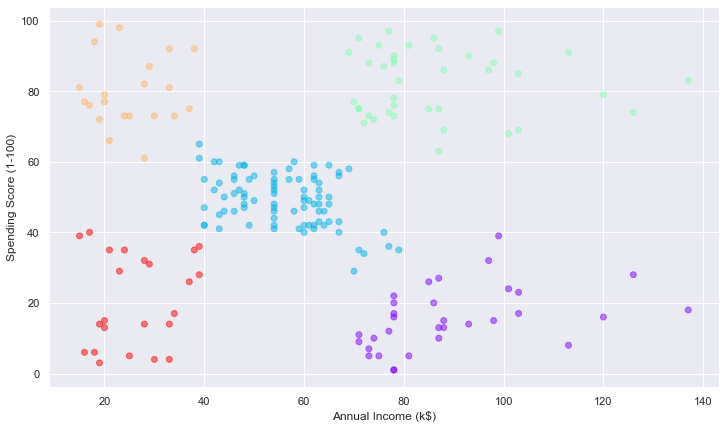

In [24]:
plt.rcParams['figure.figsize'] = (12, 7)

# plota os dados identificando seus clusters
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c = y_pred, alpha = 0.5, cmap = 'rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
# plota os centroides também
plt.show()